## Introduction to Pandas

Python for Data Analysis, 2nd Edition
Data Wrangling with Pandas, NumPy, and IPython
By William McKinney
Publisher: O'Reilly Media
Release Date: October 2017
Pages: 522
http://proquest.safaribooksonline.com/book/programming/python/9781491957653/

https://pandas.pydata.org/pandas-docs/stable/dsintro.html


<h3>Series</h3>

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. The simplest Series is formed from only an array of data:

In [5]:
import pandas as pd

In [6]:
obj = pd.Series([4, 7, -5, 3]) # no index specified, default
print (obj)

0    4
1    7
2   -5
3    3
dtype: int64


In [7]:
print (obj.values)
print (obj.index)

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


In [8]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print (obj2)

d    4
b    7
a   -5
c    3
dtype: int64


In [9]:
print (obj2.values)
print (obj2.index)

[ 4  7 -5  3]
Index(['d', 'b', 'a', 'c'], dtype='object')


In [10]:
print (obj2[obj2 > 0])

d    4
b    7
c    3
dtype: int64


In [11]:
print (obj2[0:2])
print (obj2[::2])

d    4
b    7
dtype: int64
d    4
a   -5
dtype: int64


In [12]:
print (obj2 + obj2[::2]) # note that obj2[::2] has missing values for b and c

a   -10.0
b     NaN
c     NaN
d     8.0
dtype: float64


In [20]:
#Create a series from data contained in a Python dict.
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

Exercise 1: Given two lists one containings keys and the other values, first create a dictionary and then create a Panda series using the created dictionary. Next show how to create an identical panda series directly from the two lists without converting to dictionary. Test your code on:

List1: ['Ohio', 'Texas', 'Oregon', 'Utah']

List2: [35000, 71000, 16000, 5000]

In [16]:
keys = ['Ohio', 'Texas', 'Oregon', 'Utah']
values = [35000, 71000, 16000, 5000]
dictionary = dict(zip(keys, values))
print(dictionary)

objd = pd.Series(dictionary)
print(objd)

objd1 = pd.Series([35000, 71000, 16000, 5000], index=['Ohio', 'Texas', 'Oregon', 'Utah'])
print (objd1)


{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


### Time Series 

It is a series indexed by timestamp. Time series data is an important form of structured data in many different fields, such as finance, economics, ecology, neuroscience, and physics. 



In [17]:
from datetime import datetime
import numpy as np

In [18]:
datetime?

In [19]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
            datetime(2011, 1, 7), datetime(2011, 1, 8),
            datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.180111
2011-01-05    0.040107
2011-01-07    0.524976
2011-01-08   -0.436610
2011-01-10   -1.054969
2011-01-12    0.570634
dtype: float64

In [26]:
pd.date_range?

In [20]:
import numpy as np
ts = pd.Series(np.random.randn(10),index=pd.date_range('1/1/2000', periods=10)) # default frequency daily
print (ts)


2000-01-01   -2.933712
2000-01-02   -0.381125
2000-01-03    0.231655
2000-01-04   -2.275844
2000-01-05    0.394193
2000-01-06   -0.832166
2000-01-07    0.314825
2000-01-08   -1.376397
2000-01-09    0.560084
2000-01-10    1.609746
Freq: D, dtype: float64


In [21]:
ts = pd.Series(np.random.randn(10),index=pd.date_range('1/1/2000', periods=10, freq='4H')) 
print (ts)

2000-01-01 00:00:00   -0.056944
2000-01-01 04:00:00    0.640438
2000-01-01 08:00:00    1.282582
2000-01-01 12:00:00   -0.889615
2000-01-01 16:00:00    2.040856
2000-01-01 20:00:00   -0.769603
2000-01-02 00:00:00    0.893398
2000-01-02 04:00:00   -0.095739
2000-01-02 08:00:00   -0.088905
2000-01-02 12:00:00    0.065166
Freq: 4H, dtype: float64


In [22]:
print (ts.truncate(after='2000-01-01 12:00:00'))

2000-01-01 00:00:00   -0.056944
2000-01-01 04:00:00    0.640438
2000-01-01 08:00:00    1.282582
2000-01-01 12:00:00   -0.889615
Freq: 4H, dtype: float64


Exercise 2: Create a times series that has some random values for the following dates (similar to first example):
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
            datetime(2012, 1, 7), datetime(2012, 1, 8),
            datetime(2012, 1, 10), datetime(2012, 2, 12)]
Selectively print the series for the year 2011. Next selectively print the series for January 2012.

In [27]:
dates1 = [datetime(2011, 1, 2), datetime(2011, 1, 5),
            datetime(2012, 1, 7), datetime(2012, 1, 8),
            datetime(2012, 1, 10), datetime(2012, 2, 12)]
ts1 = pd.Series(np.random.randn(6), index=dates1)

print (ts1.truncate(after='2011-01-05'))

print (ts1.truncate(before='2012-01-08'))

2011-01-02   -0.783581
2011-01-05   -0.911655
dtype: float64
2012-01-08   -0.965543
2012-01-10   -1.174613
2012-02-12    2.052623
dtype: float64


###  Data Frame 
A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index. 

One way to create a DataFrame is from a dict of equal-length lists or NumPy arrays:


In [28]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [29]:
frame.loc

In [30]:
frame['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [31]:
frame.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [32]:
#access a row
frame.loc[3]

pop         2.4
state    Nevada
year       2001
Name: 3, dtype: object

In [33]:
s=frame['state']
print(s[3])

Nevada


In [34]:
frame[['pop', 'year']]

,pop,year
0,1.5,2000
1,1.7,2001
2,3.6,2002
3,2.4,2001
4,2.9,2002
5,3.2,2003


In [35]:
frame2 = pd.DataFrame(frame)

In [36]:
frame2.iloc[4] = dict(pop=1.2,state='Virginia',year=1999)
frame2


,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,pop,state,year
5,3.2,Nevada,2003


In [37]:
frame.iloc[4] =pd.Series(dict(pop=1.2,state='Virginia',year=1999))
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,1.2,Virginia,1999
5,3.2,Nevada,2003


In [38]:
# slicing
frame[4:6]

,pop,state,year
4,1.2,Virginia,1999
5,3.2,Nevada,2003


In [39]:
print(frame[::-1]) #implicitly frame[5::-1]
print(frame[5::-1])

   pop     state  year
5  3.2    Nevada  2003
4  1.2  Virginia  1999
3  2.4    Nevada  2001
2  3.6      Ohio  2002
1  1.7      Ohio  2001
0  1.5      Ohio  2000
   pop     state  year
5  3.2    Nevada  2003
4  1.2  Virginia  1999
3  2.4    Nevada  2001
2  3.6      Ohio  2002
1  1.7      Ohio  2001
0  1.5      Ohio  2000


In [40]:
 frame.iloc[[1, 4], [0, 2]]  # select a subset identified by the intersection of row# and col#

,pop,year
1,1.7,2001
4,1.2,1999


In [41]:
frame.iloc[[1, 4], : ]

,pop,state,year
1,1.7,Ohio,2001
4,1.2,Virginia,1999


In [42]:
# create dataframe using series
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


What would happen if you would have used the following series for column 'one' while creating the dataframe d:

'one' : pd.Series([0., 1., 2., 3.], index=['d','a', 'b', 'c'])
Check it out.

In [43]:
d = {'one' : pd.Series([0., 1., 2., 3.], index=['d', 'a', 'b', 'c']), 
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


In [72]:
# delet a column
del df['two']
df

,one
a,1.0
b,2.0
c,3.0
d,0.0


In [44]:
df1 = pd.DataFrame(d)
df2 = df1
df2
del df2['two']
df1

,one
a,1.0
b,2.0
c,3.0
d,0.0


In [45]:
# for making copy
df1 = pd.DataFrame(d)
df2 = df1.copy()
df2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


In [46]:
del df2['two']
df1

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


#### Assigning New Columns 

In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
iris_df = sns.load_dataset("iris")
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [49]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
# assign a calculated column and returns a copy. the original data frame is not modified
dfn = iris_df.assign(sepal_ratio = lambda x: (x['sepal_width'] / x['sepal_length']))
dfn.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [51]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

In [102]:
iris_dfn = iris_df.query('sepal_length > 5').assign(sepal_ratio = lambda x: x.sepal_width / x.sepal_length,
                            petal_ratio = lambda x: x.petal_width / x.petal_length)
iris_dfn.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_ratio,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.142857,0.686275
5,5.4,3.9,1.7,0.4,setosa,0.235294,0.722222
10,5.4,3.7,1.5,0.2,setosa,0.133333,0.685185
14,5.8,4.0,1.2,0.2,setosa,0.166667,0.689655
15,5.7,4.4,1.5,0.4,setosa,0.266667,0.771930


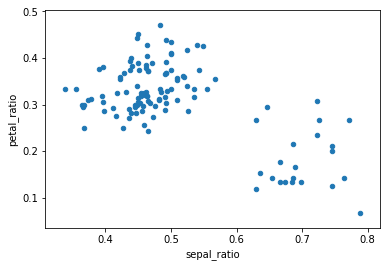

In [53]:
iris_dfn.plot(kind='scatter', x='sepal_ratio', y='petal_ratio')
plt.show()

Summarizing and Computing Descriptive Statistics
pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame.

In [54]:
data = {'C1': np.random.randn(10),
        'C2': 1.0+np.random.randn(10)}
frame = pd.DataFrame(data)
frame

,C1,C2
0,1.587766,3.110947
1,-0.534032,1.197078
2,1.275962,0.274323
3,-1.065247,-0.799231
4,1.626670,-0.401071
5,-0.045009,2.242294
6,-0.080204,1.654455
7,-0.257237,0.236287
8,-0.834789,0.995060
9,0.709027,0.716751


idxmin and idxmax, return indirect statistics like the index value where the minimum or maximum values are attained:

In [55]:
frame.idxmax()

C1    4
C2    0
dtype: int64

In [56]:
frame.cumsum()

,C1,C2
0,1.587766,3.110947
1,1.053734,4.308025
2,2.329695,4.582348
3,1.264448,3.783117
4,2.891119,3.382046
5,2.846109,5.624340
6,2.765906,7.278795
7,2.508668,7.515082
8,1.673879,8.510142
9,2.382907,9.226893


In [57]:
frame

,C1,C2
0,1.587766,3.110947
1,-0.534032,1.197078
2,1.275962,0.274323
3,-1.065247,-0.799231
4,1.626670,-0.401071
5,-0.045009,2.242294
6,-0.080204,1.654455
7,-0.257237,0.236287
8,-0.834789,0.995060
9,0.709027,0.716751


In [58]:
frame.describe()

,C1,C2
count,10.000000,10.000000
mean,0.238291,0.922689
std,0.995628,1.192436
min,-1.065247,-0.799231
25%,-0.464833,0.245796
50%,-0.062607,0.855906
75%,1.134228,1.540111
max,1.626670,3.110947


Exercise 3: User iterrow() to print out values on column C1 for dataframe frame. Please see the documentation for iterrow()

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html


In [60]:
for index, row in frame.iterrows():
    print(index, row['C1'])

0 1.58776564808
1 -0.53403212404
2 1.27596186486
3 -1.06524700326
4 1.62667027082
5 -0.0450092591567
6 -0.0802038676457
7 -0.257237238989
8 -0.834788820536
9 0.709027475353


Exercise 4: Write a lambda function for applymap to multiply every element of the iris_df by '10' except the elements in column species which are string.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html

Hint: Check for an element type and if it is float only do the required operation.

In [106]:
df1=iris_df.applymap(lambda x: x*10 if type(x) is float else x)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,51.0,35.0,14.0,2.0,setosa
1,49.0,30.0,14.0,2.0,setosa
2,47.0,32.0,13.0,2.0,setosa
3,46.0,31.0,15.0,2.0,setosa
4,50.0,36.0,14.0,2.0,setosa


<h3>Correlation and Covariance using Pandas</h3>
Let’s consider some DataFrames of stock prices and volumes obtained from Yahoo! Finance using the add-on pandas-datareader package. If you don’t have it installed already, please install using conda:

conda install pandas-datareader

http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [70]:
import pandas_datareader.data as web

In [71]:
start = datetime(2017, 10, 16)
end = datetime(2017, 10, 27)
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [72]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-16,157.899994,160.000000,157.649994,159.880005,159.307312,24121500
2017-10-17,159.779999,160.869995,159.229996,160.470001,159.895203,18997300
2017-10-18,160.419998,160.710007,159.600006,159.759995,159.187729,16374200
2017-10-19,156.750000,157.080002,155.020004,155.979996,155.421280,42584200
2017-10-20,156.610001,157.750000,155.960007,156.250000,155.690308,23974100
2017-10-23,156.889999,157.690002,155.500000,156.169998,155.610596,21984300
2017-10-24,156.289993,157.419998,156.199997,157.100006,156.537277,17757200
2017-10-25,156.910004,157.550003,155.270004,156.410004,155.849747,21207100
2017-10-26,157.229996,157.830002,156.779999,157.410004,156.846161,17000500


In [75]:
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [76]:
all_data

{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2017-10-16  157.899994  160.000000  157.649994  159.880005  159.307312   
 2017-10-17  159.779999  160.869995  159.229996  160.470001  159.895203   
 2017-10-18  160.419998  160.710007  159.600006  159.759995  159.187729   
 2017-10-19  156.750000  157.080002  155.020004  155.979996  155.421280   
 2017-10-20  156.610001  157.750000  155.960007  156.250000  155.690308   
 2017-10-23  156.889999  157.690002  155.500000  156.169998  155.610596   
 2017-10-24  156.289993  157.419998  156.199997  157.100006  156.537277   
 2017-10-25  156.910004  157.550003  155.270004  156.410004  155.849747   
 2017-10-26  157.229996  157.830002  156.779999  157.410004  156.846161   
 2017-10-27  159.289993  163.600006  158.699997  163.050003  162.465958   
 
               Volume  
 Date                  
 2017-10-16  24121500  
 2017-10-17  18997

In [77]:
type(all_data)

dict

In [78]:
all_data.keys()

dict_keys(['AAPL', 'IBM', 'MSFT', 'GOOG'])

In [79]:
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [80]:
price

,AAPL,GOOG,IBM,MSFT
Date,,,,
2017-10-16,159.307312,992.000000,143.959518,77.261986
2017-10-17,159.895203,992.179993,143.675186,77.202278
2017-10-18,159.187729,992.809998,156.411240,77.222183
2017-10-19,155.421280,984.450012,157.754456,77.520683
2017-10-20,155.690308,988.200012,158.901581,78.416183
2017-10-23,155.610596,968.450012,156.430862,78.436089
2017-10-24,156.537277,970.539978,152.832596,78.465935
2017-10-25,155.849747,973.330017,150.499115,78.237083
2017-10-26,156.846161,972.559998,150.597183,78.366440


###  One Period Simple Return for a stock

<i>Defnition: </i>Let $S_{i-1}$ and $S_i$  be the price of a stock at time $t_{i-1}$ and $t_i$ respectively. Then a simple return $r_i$ for an asset at time $t_i$ for one unit of time is given by:
\begin{equation*}
r_i = \frac{S_i - S_{i-1}}{S_{i-1}}
\end{equation*}
A simple gross return for one period is given by:

$$ (1 + r_i) = \frac{S_i}{S_{i-1}}$$
Example: 
\begin{eqnarray*}
S_{i-1} & = & 10 \\
S_{i} & = & 15 \\
r_i & = & \frac{15-10}{10} = 0.50
\end{eqnarray*}
Asset has a simple return of $50\%$ at time $t_i$ for one unit of time

###  Multiperiod Simple Return for a stock
If we hold the stock  for k periods, say from time $t_1$ to $t_{k+1}$ then the $k$-period simple <b>gross</b> return at $t_{k+1}$  is given by:

\begin{eqnarray*}
1+r_{k+1}^k & = &  \frac{S_{k+1}}{S_{1}}    \\
  & =  &   \frac{S_{k+1}}{S_{k}} \times \frac{S_{k}}{S_{k-1}} \times \ldots \frac{S_{2}}{S_{1}} \\
  & =  &  (1+r_{k+1}) (1+r_{k}) \ldots (1+r_2)  \\
  & =  &  \prod_{j=1}^{k} (1+r_{j+1})
\end{eqnarray*}

In other words, the $k$-period simple gross return is just the product of $k$ one-period gross returns involved.


In [83]:
returns = price.pct_change()
returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2017-10-16,NaN,NaN,NaN,NaN
2017-10-17,0.003690,0.000181,-0.001975,-0.000773
2017-10-18,-0.004425,0.000635,0.088645,0.000258
2017-10-19,-0.023660,-0.008421,0.008588,0.003865
2017-10-20,0.001731,0.003809,0.007272,0.011552
2017-10-23,-0.000512,-0.019986,-0.015549,0.000254
2017-10-24,0.005955,0.002158,-0.023002,0.000381
2017-10-25,-0.004392,0.002875,-0.015268,-0.002917
2017-10-26,0.006393,-0.000791,0.000652,0.001653


In [84]:
rgross = returns + 1.0
print (rgross)

                AAPL      GOOG       IBM      MSFT
Date                                              
2017-10-16       NaN       NaN       NaN       NaN
2017-10-17  1.003690  1.000181  0.998025  0.999227
2017-10-18  0.995575  1.000635  1.088645  1.000258
2017-10-19  0.976340  0.991579  1.008588  1.003865
2017-10-20  1.001731  1.003809  1.007272  1.011552
2017-10-23  0.999488  0.980014  0.984451  1.000254
2017-10-24  1.005955  1.002158  0.976998  1.000381
2017-10-25  0.995608  1.002875  0.984732  0.997083
2017-10-26  1.006393  0.999209  1.000652  1.001653
2017-10-27  1.035830  1.048028  1.000521  1.064119


In [85]:
_ = rgross.fillna(1.0, inplace=True)  # assume the return on the first day was zero
print (rgross)

                AAPL      GOOG       IBM      MSFT
Date                                              
2017-10-16  1.000000  1.000000  1.000000  1.000000
2017-10-17  1.003690  1.000181  0.998025  0.999227
2017-10-18  0.995575  1.000635  1.088645  1.000258
2017-10-19  0.976340  0.991579  1.008588  1.003865
2017-10-20  1.001731  1.003809  1.007272  1.011552
2017-10-23  0.999488  0.980014  0.984451  1.000254
2017-10-24  1.005955  1.002158  0.976998  1.000381
2017-10-25  0.995608  1.002875  0.984732  0.997083
2017-10-26  1.006393  0.999209  1.000652  1.001653
2017-10-27  1.035830  1.048028  1.000521  1.064119


<a id='gross_return_plot'></a>
#### Gross Return Plot

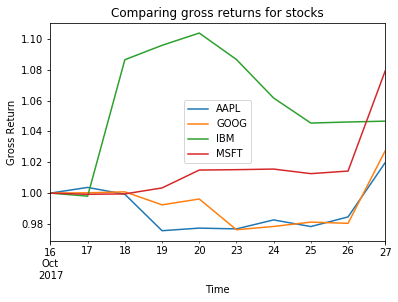

In [86]:
prs = rgross.cumprod()
prs.plot()
plt.title('Comparing gross returns for stocks')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend();
plt.show()

The cov (corr) method of Series can compute the covariance (coorelation) between the two series (non NaN and aligned-by-index).

In [87]:
returns['MSFT'].corr(returns['IBM'])

-0.040516397921810297

In [88]:
returns['MSFT'].cov(returns['IBM'])

-2.832667864017147e-05

DataFrame’s corr and cov methods, on the other hand, return a full correlation or covariance matrix as a DataFrame, respectively:

In [89]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000241,0.000233,-0.000093,0.000258
GOOG,0.000233,0.000339,0.000012,0.000354
IBM,-0.000093,0.000012,0.001090,-0.000028
MSFT,0.000258,0.000354,-0.000028,0.000449


In [90]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.814865,-0.181337,0.786037
GOOG,0.814865,1.000000,0.019554,0.906196
IBM,-0.181337,0.019554,1.000000,-0.040516
MSFT,0.786037,0.906196,-0.040516,1.000000


In [91]:
returns.corrwith(returns.IBM)

AAPL   -0.181337
GOOG    0.019554
IBM     1.000000
MSFT   -0.040516
dtype: float64

In [92]:
#compute correlations of percent changes with volume
print (volume)
print (returns.corrwith(volume))

                AAPL     GOOG       IBM      MSFT
Date                                             
2017-10-16  24121500   910500   3052100  12380100
2017-10-17  18997300  1290200   6372400  16824000
2017-10-18  16374200  1057600  30490200  13300700
2017-10-19  42584200  1313600   9914200  15092800
2017-10-20  23974100  1183200   7868800  22866400
2017-10-23  21984300  1478400   5779400  20627200
2017-10-24  17757200  1212200   8194700  17517200
2017-10-25  21207100  1211300   6921100  20410800
2017-10-26  17000500  2042100   4300500  32120700
2017-10-27  44454200  5167700   4895200  71066700
AAPL    0.163993
GOOG    0.868345
IBM     0.928818
MSFT    0.945554
dtype: float64


Exercise 5 (Take Home): Use the pandas_datareader to get the daily price for the year 2017 for stocks: STLD, NUE, and IBM. PLot the gross returns for the three stocks based on 'Adj Close' price of a stock as shown in the notebook. Comment on what you observe from the plots in terms of how similar or different are the plots for different stocks. Next compute the coorelation matrix and comment on what you observe. 

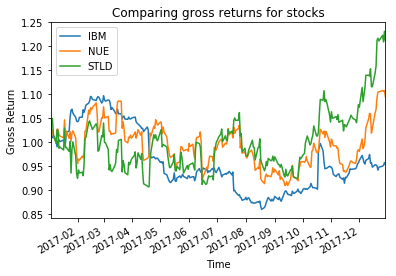

,IBM,NUE,STLD
IBM,1.000000,0.138282,0.093177
NUE,0.138282,1.000000,0.847522
STLD,0.093177,0.847522,1.000000


In [15]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime
start = datetime(2017, 1, 1 )
end = datetime(2017, 12, 31)
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['STLD', 'NUE', 'IBM']}
type(all_data)
all_data.keys()
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
returns = price.pct_change()
rgross = returns + 1.0
_ = rgross.fillna(1.0, inplace=True)
prs = rgross.cumprod()
prs.plot()
plt.title('Comparing gross returns for stocks')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend()
plt.show()

#The IBM had good gross returns in the beginning of the year but later shows a decline in returns
#The NUE and STLD are consistent but STLD displays a sharp increase in returns later.

returns.corr()
#From the matrix we can observe that NUE and STLD are close to 1: higher correlation than the other pairs.

### Filtering Out Missing Data

In [110]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [111]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

With DataFrame objects, things are a bit more complex. You may want to drop rows or columns that are all NA or only 
those containing any NAs. dropna by default drops any row containing a missing value:

In [112]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [113]:
cleaned = data.dropna()
print (data)
print (cleaned)

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
     0    1    2
0  1.0  6.5  3.0


In [114]:
#Passing how='all' will only drop rows that are all NA:
cleaned = data.dropna(how='all')
print (cleaned)

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0


In [115]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
print (df)

          0         1         2
0  0.005656       NaN       NaN
1  1.182487       NaN       NaN
2  0.582948       NaN  0.058315
3 -0.877522       NaN -0.919093
4  1.079126 -1.407565 -1.374665
5 -2.535753 -1.526592 -0.687800
6 -1.620461  0.305735  1.466161


In [116]:
print (df.dropna())
df.dropna(thresh=2)

          0         1         2
4  1.079126 -1.407565 -1.374665
5 -2.535753 -1.526592 -0.687800
6 -1.620461  0.305735  1.466161


,0,1,2
2,0.582948,NaN,0.058315
3,-0.877522,NaN,-0.919093
4,1.079126,-1.407565,-1.374665
5,-2.535753,-1.526592,-0.687800
6,-1.620461,0.305735,1.466161


### Filling In Missing Data
Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. Calling fillna with a constant replaces missing values with that value:

In [117]:
print(df)

          0         1         2
0  0.005656       NaN       NaN
1  1.182487       NaN       NaN
2  0.582948       NaN  0.058315
3 -0.877522       NaN -0.919093
4  1.079126 -1.407565 -1.374665
5 -2.535753 -1.526592 -0.687800
6 -1.620461  0.305735  1.466161


In [118]:
print (df.fillna(0))

          0         1         2
0  0.005656  0.000000  0.000000
1  1.182487  0.000000  0.000000
2  0.582948  0.000000  0.058315
3 -0.877522  0.000000 -0.919093
4  1.079126 -1.407565 -1.374665
5 -2.535753 -1.526592 -0.687800
6 -1.620461  0.305735  1.466161


In [119]:
df.fillna({1: 0.5, 2: 0}) # column 1 NAs are replaced by 0.5 and column 2 NAs are replaced by 0

,0,1,2
0,0.005656,0.500000,0.000000
1,1.182487,0.500000,0.000000
2,0.582948,0.500000,0.058315
3,-0.877522,0.500000,-0.919093
4,1.079126,-1.407565,-1.374665
5,-2.535753,-1.526592,-0.687800
6,-1.620461,0.305735,1.466161


### Removing Duplicates
The DataFrame method duplicated returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row) or not:

In [120]:
# generate some data with duplicates
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [121]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [122]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [123]:
data['v1'] = range(7)

In [124]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [125]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [152]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


Exercise 6: Create the following dataframe:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three']).  Next reindex this dataframe by:

df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

Check null entries in dataframe by using isnull() function. Next fill the null values by zeros.

In [129]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
print(df)
print()
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
print(df2)
print()
print (df2.fillna(0))

        one       two     three
a  0.392690 -0.783552 -0.771994
c -0.325460 -0.254963  0.228334
e -1.066272  0.172451  0.568775
f -0.120903  0.182785  1.032465
h  1.743286 -0.373931 -0.795919

        one       two     three
a  0.392690 -0.783552 -0.771994
b       NaN       NaN       NaN
c -0.325460 -0.254963  0.228334
d       NaN       NaN       NaN
e -1.066272  0.172451  0.568775
f -0.120903  0.182785  1.032465
g       NaN       NaN       NaN
h  1.743286 -0.373931 -0.795919

        one       two     three
a  0.392690 -0.783552 -0.771994
b  0.000000  0.000000  0.000000
c -0.325460 -0.254963  0.228334
d  0.000000  0.000000  0.000000
e -1.066272  0.172451  0.568775
f -0.120903  0.182785  1.032465
g  0.000000  0.000000  0.000000
h  1.743286 -0.373931 -0.795919


## Hierarchical Indexing
Hierarchical indexing is an important feature of pandas that enables you to have multiple (two or more) index levels on an axis. 

In [130]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

data #The “gaps” in the index display mean “use the label directly above”

a  1   -1.450196
   2    1.833810
   3    1.568125
b  1   -1.186769
   3   -1.113516
c  1   -1.028206
   2   -0.615999
d  2   -0.180773
   3    0.037938
dtype: float64

In [131]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [132]:
#With a hierarchically indexed object, so-called partial 
#indexing is possible, enabling you to concisely select subsets of the data:
print (data['b'])

1   -1.186769
3   -1.113516
dtype: float64


In [133]:
print (data['b':'c'])

b  1   -1.186769
   3   -1.113516
c  1   -1.028206
   2   -0.615999
dtype: float64


In [134]:
print (data.loc[['b', 'c']])

b  1   -1.186769
   3   -1.113516
c  1   -1.028206
   2   -0.615999
dtype: float64


In [166]:
print (data)
data.loc[:, 2]

a  1   -0.504202
   2    1.147515
   3   -1.179531
b  1   -0.989391
   3   -0.015345
c  1    0.847121
   2   -0.875072
d  2   -0.228737
   3   -1.045054
dtype: float64


a    1.147515
c   -0.875072
d   -0.228737
dtype: float64

In [135]:
data.unstack()

,1,2,3
a,-1.450196,1.833810,1.568125
b,-1.186769,NaN,-1.113516
c,-1.028206,-0.615999,NaN
d,NaN,-0.180773,0.037938


In [169]:
data.unstack().stack()

a  1   -0.504202
   2    1.147515
   3   -1.179531
b  1   -0.989391
   3   -0.015345
c  1    0.847121
   2   -0.875072
d  2   -0.228737
   3   -1.045054
dtype: float64

Exercise 7: For the hierarchically indexed object as created in the example above:

data = pd.Series(np.random.randn(9), index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 3, 1, 2, 2, 3]])

Use unstack function to create a dataframe that looks like this when you print (Hint: Look at the documentation):


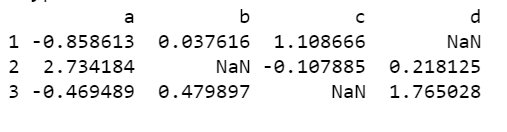

Note that the actual  numerical values  may be different from this because we are using random numbers to populate the object. 


In [157]:
data = pd.Series(np.random.randn(9), index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 3, 1, 2, 2, 3]])
print(data.unstack(level=0))


          a         b         c         d
1  0.743031  1.554215 -0.694598       NaN
2 -2.570022       NaN  0.233476  1.059239
3  1.982180  1.000229       NaN  0.571511


Exercise 8 (Take Home): Create a dataframe with hierarchical indexing as follows:

Define an arrays object: <br>
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], 
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

Create index using MultiIndex<br>          
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

Create data frame:<br>
s = pd.Series(np.random.randn(8), index=index)

Perform group by at level 0 and do the sum operation. Repeat the same for level 1.

In [159]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
s = pd.Series(np.random.randn(8), index=index)
print(s)
print()
y = s.groupby(level = 0).sum()
print(y)
print()
x = s.groupby(level = 1).sum()
print(x)

first  second
bar    one       1.738902
       two       0.550103
baz    one       0.420022
       two       0.960847
foo    one      -0.985062
       two       0.783699
qux    one       0.053882
       two       1.326163
dtype: float64

first
bar    2.289005
baz    1.380869
foo   -0.201363
qux    1.380045
dtype: float64

second
one    1.227745
two    3.620812
dtype: float64
